## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [13]:
import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [14]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [15]:
""
print("Records in test set: ", x_train.shape[0])
print("Records in training set: ", x_test.shape[0])

Records in test set:  60000
Records in training set:  10000


### Find dimensions of an image in the dataset

In [16]:
print("Dimension of an image in the dataset: ", x_train[0].shape)

Dimension of an image in the dataset:  (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [17]:
yTrain = keras.utils.to_categorical(y_train)
yTest = keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [18]:
"""
As the value ranges from 0 to 255, therefore, normalize by dividing each value by 255.

---***---

NOTE:
min-max scaler value = (value - min)/(max-min)

In above replacing min with 0 and max with 255 gives:
SCALED VALUE = value/max
"""

xTrain = x_train/255
xTest = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [19]:
print("Shape before reshaping: ", xTrain.shape)

xTrain = xTrain.reshape(xTrain.shape[0], 28, 28, 1)
xTest = xTest.reshape(xTest.shape[0], 28, 28, 1)

print("Shape after reshaping:  ", xTrain.shape)

Shape before reshaping:  (60000, 28, 28)
Shape after reshaping:   (60000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [20]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, BatchNormalization, Dense, Activation

# Imports for convolution
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [21]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [38]:
xTrain.shape

(60000, 28, 28, 1)

In [0]:
# # Define the Type of Model
# model1 = Sequential()

# # Flatten Imgaes to Vector
# model1.add(Reshape((784,), input_shape=(28, 28, 1)))   # Not required. Already reshaped.

# # Layer 1
# model1.add(Dense(128, kernel_initializer="he_normal", use_bias=True, activation='relu'))

# # Layer 2
# model1.add(Dense(units=10, kernel_initializer='he_normal', use_bias=True, activation="softmax"))
# # model1.add(Activation("softmax"))

# # Loss and Optimizer
# model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Store Training Results
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
# callback_list = [early_stopping]# [stats, early_stopping]

# # Train the model
# model1.fit(xTrain, yTrain, epochs=EPOCHS, batch_size=BATCH_SIZE,
#            validation_data=(xTest, yTest), 
#            callbacks=callback_list, 
#            verbose=True
#           )

In [12]:
# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))
# model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3, activation='relu'))
# model2.add(Activation('relu'))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
# model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10, activation='softmax'))
# model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(xTrain, yTrain, batch_size=BATCH_SIZE, epochs=EPOCHS, 
          validation_data=(xTest, yTest), callbacks=callback_list)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.5199 - acc: 0.8112 - val_loss: 0.4068 - val_acc: 0.8515
Epoch 2/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3591 - acc: 0.8686 - val_loss: 0.3616 - val_acc: 0.8676
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3150 - acc: 0.8825 - val_loss: 0.3364 - val_acc: 0.8767
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2876 - acc: 0.8927 - val_loss: 0.3203 - val_acc: 0.8794
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2653 - acc: 0.9005 - val_loss: 0.3166 - val_acc: 0.8846
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2491 - acc: 0.9064 - val_loss: 0.3122 - val_acc: 0.8862
Epoch 7/10
60000/60000 [==========

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [13]:
# Define Model
model3 = Sequential()

# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3, activation='relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model3.add(Dropout(0.25))

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))

# More Dropout
model3.add(Dropout(0.25))

# Prediction Layer
model3.add(Dense(10, activation='softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model3.fit(xTrain, yTrain, batch_size=BATCH_SIZE, epochs=EPOCHS, 
          validation_data=(xTest, yTest), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.9307 - acc: 0.6634 - val_loss: 0.6333 - val_acc: 0.7639
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.6819 - acc: 0.7532 - val_loss: 0.5705 - val_acc: 0.7893
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.6325 - acc: 0.7709 - val_loss: 0.5390 - val_acc: 0.8022
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.6010 - acc: 0.7789 - val_loss: 0.5295 - val_acc: 0.8043
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5841 - acc: 0.7862 - val_loss: 0.5109 - val_acc: 0.8139
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.5670 - acc: 0.7933 - val_loss: 0.5016 - val_acc: 0.8173
Epoch 7/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5565 - acc: 0.7975 - val_loss: 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(xTrain)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

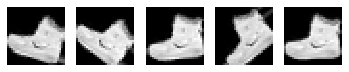

In [26]:
from matplotlib import pyplot as plt

%matplotlib inline

gen = datagen.flow(xTrain[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [39]:
# Define Model
model4 = Sequential()

# 1st Conv Layer
model4.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# 2nd Conv Layer
model4.add(Convolution2D(32, 3, 3, activation='relu'))

# Max Pooling
model4.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model4.add(Dropout(0.25))

# Fully Connected Layer
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))

# More Dropout
model4.add(Dropout(0.25))

# Prediction Layer
model4.add(Dense(10, activation='softmax'))

# Loss and Optimizer
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model4.fit_generator(datagen.flow(xTrain, yTrain, batch_size=BATCH_SIZE), epochs=EPOCHS, 
          validation_data=(xTest, yTest), callbacks=callback_list)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.3824 - acc: 0.4843 - val_loss: 1.0077 - val_acc: 0.6157
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.1112 - acc: 0.5935 - val_loss: 0.9178 - val_acc: 0.6460
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.0351 - acc: 0.6203 - val_loss: 0.8515 - val_acc: 0.6839
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.0035 - acc: 0.6305 - val_loss: 0.8296 - val_acc: 0.6900
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.9820 - acc: 0.6406 - val_loss: 0.8205 - val_acc: 0.7006
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9612 - acc: 0.6489 - val_loss: 0.8122 - val_acc: 0.7001
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9471 - acc: 0.6539 - val_loss: 0.8083 - val_acc: 0.7048
Epoch 8/10
1875/1875 [==============================]

###  Report the final train and validation accuracy

In [40]:
model4.evaluate(xTrain, yTrain)

60000/60000 [==============================] - 3s 57us/sample - loss: 0.7588 - acc: 0.7236


[0.7587557470003764, 0.7236]

In [41]:
model4.evaluate(xTest, yTest)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.7756 - acc: 0.7129


[0.7756323654174805, 0.7129]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from tensorflow.keras.datasets import cifar10

In [44]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen2 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen2.fit(xTrain)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

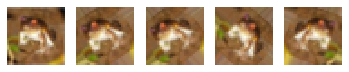

In [47]:
"""
WHY NORMALIZE BEFORE CALLING datagen.flow()?

REASON:
The datagen.flow() expects a image with value of each pixel in range of 0 and 1.
"""
xTrain = xTrain/255
xTest = xTest/255


gen2 = datagen2.flow(xTrain[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen2.next().squeeze(), cmap=None)
    plt.plot()
plt.show()